In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\tc\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ASEAN = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_ASEAN = df[df['job_country'].isin(ASEAN)].dropna(subset='salary_year_avg').copy()

In [3]:
job_titles = df_ASEAN['job_title_short'].value_counts().index[:6].to_list()

df_jobs_top6 = df_ASEAN[df_ASEAN['job_title_short'].isin(job_titles)]

job_order = df_jobs_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

print(job_order)

Index(['Senior Data Engineer', 'Senior Data Analyst', 'Data Analyst',
       'Data Engineer', 'Data Scientist', 'Machine Learning Engineer'],
      dtype='object', name='job_title_short')


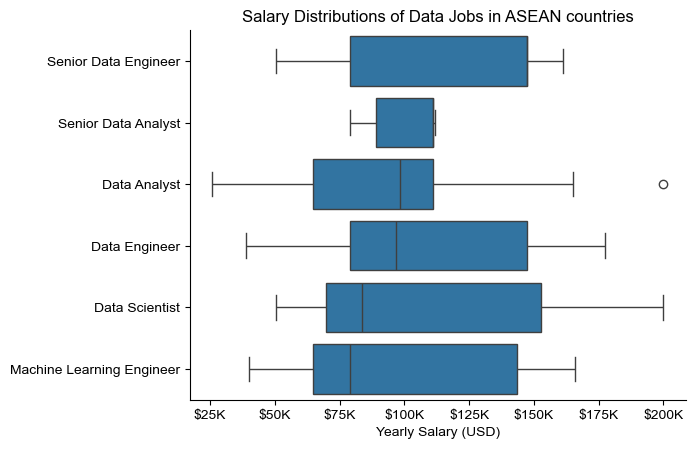

In [4]:
sns.boxplot(data=df_jobs_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in ASEAN countries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ticks = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks)
plt.show()

In [5]:
df_DA_ASEAN = df[(df['job_country'].isin(ASEAN)) & (df['job_title_short'] == 'Data Analyst')]

df_DA_ASEAN = df_DA_ASEAN.dropna(subset='salary_year_avg')

df_DA_ASEAN = df_DA_ASEAN.explode('job_skills')

df_DA_ASEAN[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
3457,100500.0,python
3457,100500.0,sql
3457,100500.0,numpy
3457,100500.0,pandas
3457,100500.0,zoom


In [6]:
df_DA_ASEAN_top_pay = df_DA_ASEAN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(ascending=False, by='median')

df_DA_ASEAN_top_pay = df_DA_ASEAN_top_pay.head(10)

df_DA_ASEAN_top_pay

,count,median
job_skills,,
golang,1,165000.0
redshift,1,165000.0
kafka,2,165000.0
git,1,165000.0
scala,2,138087.5
spark,8,130414.0
javascript,2,115500.0
pandas,4,111175.0
sheets,1,111175.0


In [7]:
df_DA_ASEAN_top_skills = df_DA_ASEAN.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(ascending=False, by='count')

df_DA_ASEAN_top_skills = df_DA_ASEAN_top_skills.head(10).sort_values(ascending=False, by='median')

df_DA_ASEAN_top_skills

,count,median
job_skills,,
spark,8,130414.0
looker,8,102750.0
tableau,36,100500.0
excel,34,100500.0
sql,62,99500.0
python,42,99500.0
r,24,98500.0
power bi,23,98500.0
word,8,89850.0


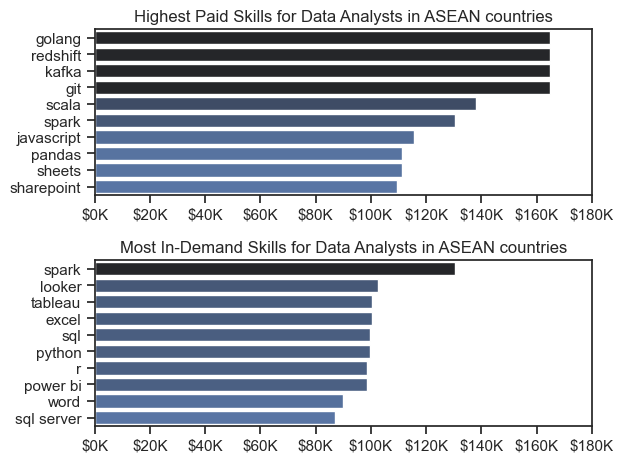

In [8]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_DA_ASEAN_top_pay, x='median', y='job_skills', ax=ax[0], hue='median', palette='dark:b_r')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Skills for Data Analysts in ASEAN countries')
ax[0].legend().remove()
ax[0].set_xlim(0, 180000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_ASEAN_top_skills, x='median', y='job_skills', ax=ax[1], hue='median', palette='dark:b_r')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Most In-Demand Skills for Data Analysts in ASEAN countries')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()